Confusion matrix code


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred, labels=class_names)
  fig, ax = plt.subplots(figsize=(10, 10)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(230, 30, n=9),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_title('Confusion Matrix')
  ax.set_xticklabels(class_names, rotation = 45)
  ax.set_yticklabels(class_names, rotation=0)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

In [ ]:
plot_cm(
  labels,
  predictions,
  [0,1,2]
)

NameError: ignored

# Set Up (No need to edit this section)

Imports

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
ls

sample_data/


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

import json
import numpy as np

Set up Cloud Directories

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_folder_path = '/content/drive/MyDrive/CSC5218_Project_DL'
models_folder_path = os.path.join(project_folder_path, "saved models")
data_folder_path = os.path.join(project_folder_path, "data")
results_folder_path = os.path.join(project_folder_path, "results")

Unzip raw data in colab's vm

In [ ]:
raw_data_path = os.path.join(data_folder_path, 'raw', 'dataset.zip')
print(raw_data_path)

/content/drive/MyDrive/CSC5218_Project_DL/data/raw/dataset.zip


In [ ]:
!unzip $raw_data_path

Archive:  /content/drive/MyDrive/CSC5218_Project_DL/data/raw/dataset.zip
   creating: dataset/Glioma/
  inflating: dataset/Glioma/0.png    
  inflating: dataset/Glioma/1.png    
  inflating: dataset/Glioma/10.png   
  inflating: dataset/Glioma/100.png  
  inflating: dataset/Glioma/101.png  
  inflating: dataset/Glioma/102.png  
  inflating: dataset/Glioma/103.png  
  inflating: dataset/Glioma/104.png  
  inflating: dataset/Glioma/105.png  
  inflating: dataset/Glioma/106.png  
  inflating: dataset/Glioma/107.png  
  inflating: dataset/Glioma/1073.png  
  inflating: dataset/Glioma/1074.png  
  inflating: dataset/Glioma/1075.png  
  inflating: dataset/Glioma/1076.png  
  inflating: dataset/Glioma/1077.png  
  inflating: dataset/Glioma/1078.png  
  inflating: dataset/Glioma/1079.png  
  inflating: dataset/Glioma/108.png  
  inflating: dataset/Glioma/1080.png  
  inflating: dataset/Glioma/1083.png  
  inflating: dataset/Glioma/1084.png  
  inflating: dataset/Glioma/1085.png  
  inflating: 

Set up the dataset

In [ ]:
!ls

dataset  drive	sample_data


In [ ]:
batch_size = 32
image_height = 512
image_width = 512
dataset_path = 'dataset'

In [ ]:
image_SIZE = (image_height, image_width)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)



Found 3064 files belonging to 3 classes.
Using 2452 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 3064 files belonging to 3 classes.
Using 612 files for validation.


In [ ]:
val_ds.class_names

['Glioma', 'Meningioma', 'Pituitary tumor']

In [ ]:
val_batches = tf.data.experimental.cardinality(val_ds)

# Create test set from validation set

test_ds = val_ds.take(val_batches // 3)
val_ds = val_ds.skip(val_batches // 3)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

Number of validation batches: 14
Number of test batches: 6


In [ ]:
train_ds.class_names

['Glioma', 'Meningioma', 'Pituitary tumor']

My experiments


In [ ]:
batch_size = 32
image_height = 512
image_width = 512
dataset_path = 'dataset'

In [ ]:
image_SIZE = (image_height, image_width)
image_SIZE

(512, 512)

Looking at the data



(512, 512, 3)

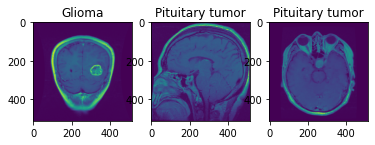

In [ ]:
fig, axs = plt.subplots(1,3)

image_batch = next(iter(train_ds)) # Grab a batch
for i in range(3):
  x_train = np.array(image_batch[0])[i] # Grab ith image
  label = np.array(image_batch[1])[i] # Grab ith label
  y_train = train_ds.class_names[label] # Get label name
  # Plot
  image_as_array = np.array(x_train).astype(np.uint8) 
  axs[i].set_title(y_train)
  axs[i].imshow(image_as_array)

np.shape(x_train)

In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras import regularizers
import matplotlib.cm as cm
from keras.layers import Activation, Dropout
import tensorflow as tf
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Convolution2D as Conv2D
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
#from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [ ]:
model = Sequential()

In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = model(image_batch)
print(feature_batch.shape)

(32, 512, 512, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(512, 512,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(256, (4, 4))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, (2, 2))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 

model.add(Dense(1024, kernel_regularizer=regularizers.l2(0.001))) 
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3)) 
model.add(Activation('softmax'))

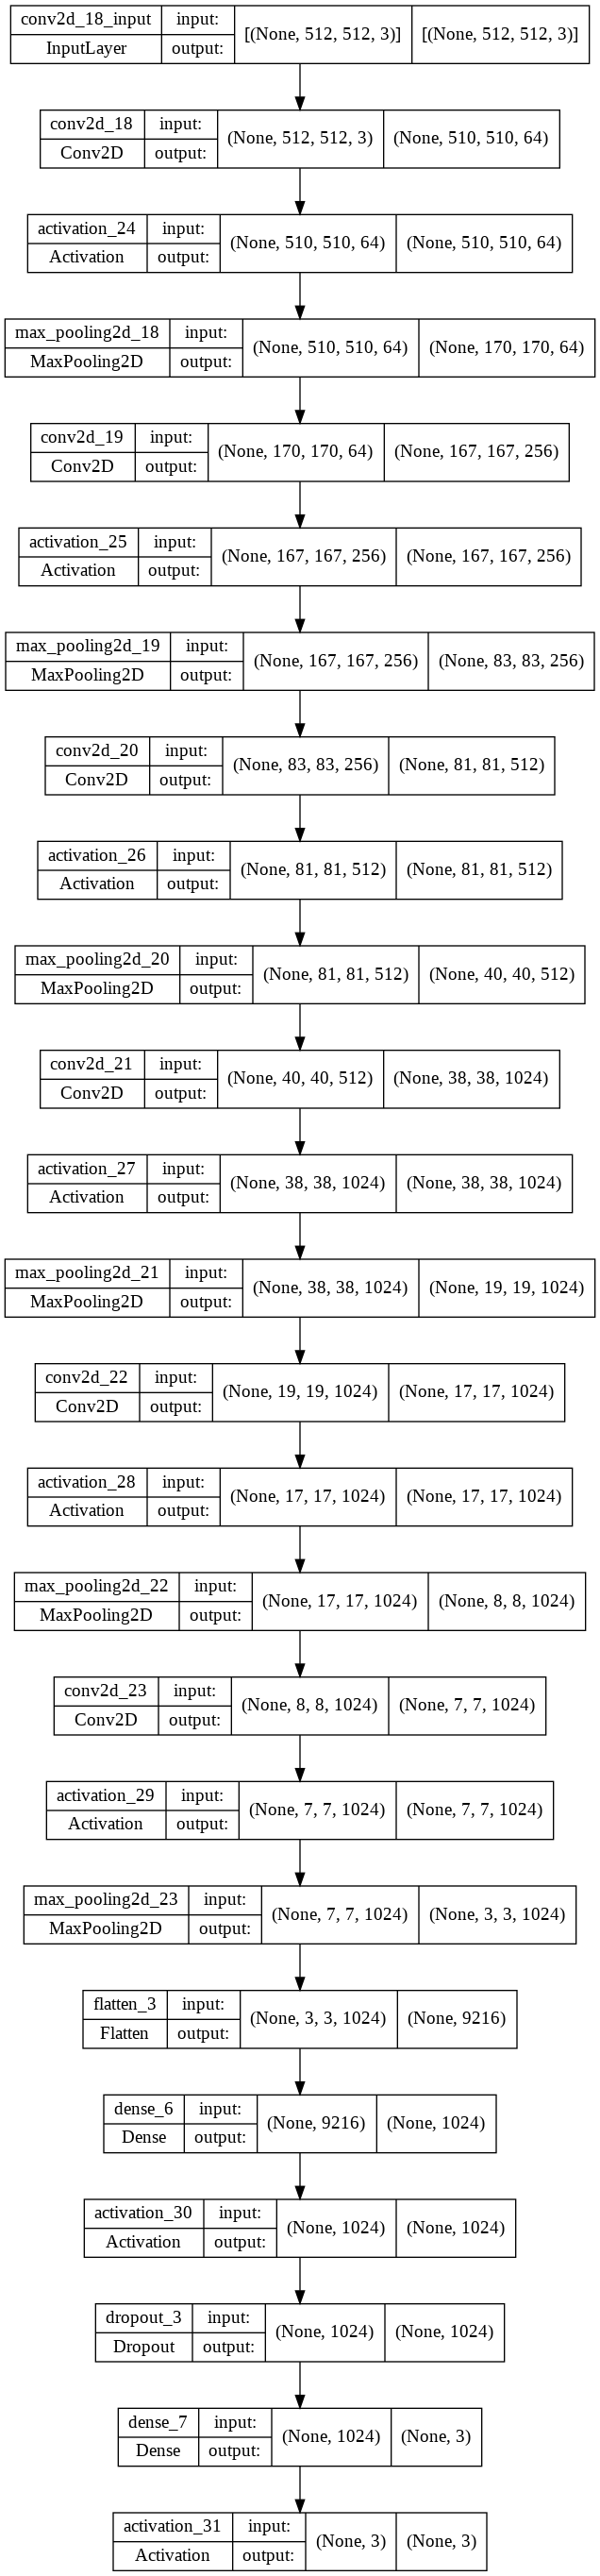

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Glioma', 'Meningioma', 'Pituitary tumor']


In [ ]:
history = model.fit(train_ds, 
                    validation_data=val_ds, epochs=20)

Epoch 1/20
77/77 [==============================] - 49s 567ms/step - loss: 63.9858 - accuracy: 0.4343 - val_loss: 2.0782 - val_accuracy: 0.5357
Epoch 2/20
77/77 [==============================] - 44s 538ms/step - loss: 1.7791 - accuracy: 0.6644 - val_loss: 1.5092 - val_accuracy: 0.7976
Epoch 3/20
77/77 [==============================] - 44s 538ms/step - loss: 1.5160 - accuracy: 0.7561 - val_loss: 1.3527 - val_accuracy: 0.8238
Epoch 4/20
77/77 [==============================] - 44s 539ms/step - loss: 1.3607 - accuracy: 0.7883 - val_loss: 1.2247 - val_accuracy: 0.8476
Epoch 5/20
77/77 [==============================] - 44s 541ms/step - loss: 1.2416 - accuracy: 0.8206 - val_loss: 1.2347 - val_accuracy: 0.8048
Epoch 6/20
77/77 [==============================] - 44s 540ms/step - loss: 1.1225 - accuracy: 0.8487 - val_loss: 1.0499 - val_accuracy: 0.8571
Epoch 7/20
77/77 [==============================] - 44s 540ms/step - loss: 1.0410 - accuracy: 0.8772 - val_loss: 1.0382 - val_accuracy: 0.847

Origin good one below: should keep it

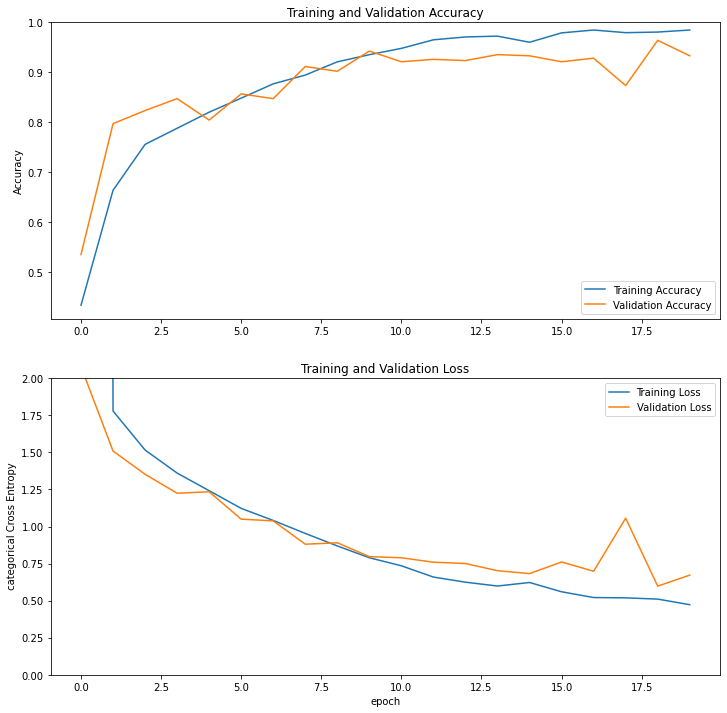

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel(' categorical Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.evaluate(test_ds)

6/6 [==============================] - 19s 675ms/step - loss: 0.7083 - accuracy: 0.9271


[0.7083088755607605, 0.9270833134651184]

In [ ]:
predictions = []
labels = []
for x, y in test_ds:
  predictions.extend(model.predict(x))
  labels.extend(y.numpy())

In [ ]:
len(predictions)

192

In [ ]:
predictions = [np.argmax(x) for x in predictions]

In [ ]:
predictions

In [ ]:
print(labels)

[1 2 0 1 0 2 1 1 2 0 0 1 2 1 0 1 2 2 0 0 2 2 0 0 2 2 0 0 0 0 0 2]


In [ ]:
len(predictions)

192

In [ ]:
len(labels)

192

**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

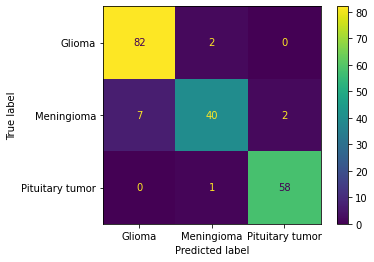

In [ ]:
cm= confusion_matrix(labels, predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
cmd.plot()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(labels, predictions)

array([[82,  2,  0],
       [ 7, 40,  2],
       [ 0,  1, 58]])

Precision and F1 score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        84
           1       0.93      0.82      0.87        49
           2       0.97      0.98      0.97        59

    accuracy                           0.94       192
   macro avg       0.94      0.93      0.93       192
weighted avg       0.94      0.94      0.94       192



Save model

Model specific paths

In [ ]:
print(models_folder_path)

/content/drive/MyDrive/CSC5218_Project_DL/saved models


In [ ]:
my_saved_models_path = os.path.join(models_folder_path, 'CNN', 'CNN.h5')
print(my_saved_models_path)

/content/drive/MyDrive/CSC5218_Project_DL/saved models/CNN/CNN.h5


In [ ]:
model.save(my_saved_models_path)

For loading saved model, saved checkpoints, and setting up future checkpoints

In [ ]:
# Load a model if applicable (for further training)
model = tf.keras.models.load_model(my_saved_models_path)

In [ ]:
model.layers